# This notebook is dedicated to the feature selection of the Research Project's datasets
### MSC/DSA/134

In [1]:
# import required packages
import time
import numpy as np
import pandas as pd
from globals.pandas_functions import *
from sklearn.decomposition import PCA
from globals.data_visualizations import *
import joblib

In [2]:
# load preprocessed training and testing data
data_base_path = "data/processed/null_value_option_1_with_validation_set/scaled_and_balanced"

X_train = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_x_train_balanced.csv")
X_validation = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_x_validation_scaled.csv")
X_test = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_x_test_scaled.csv")

y_train = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_y_train_balanced.csv")
y_validation = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_y_validation.csv")
y_test = pd.read_csv(f"{data_base_path}/unified_transaction_data_option2_y_test.csv")

In [3]:
dataset_dimension("X_train", X_train)

X_train dataset dimension: (683822, 26)


In [4]:
# Apply PCA for feature selection
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_validation_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

# explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

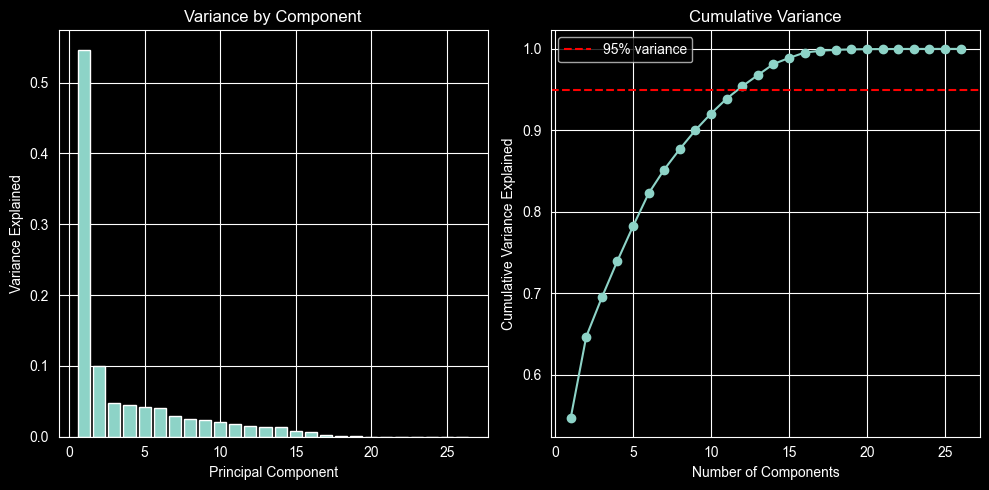

In [5]:
# plot explained variance
plot_pca(explained_variance, cumulative_explained_variance)

In [8]:
# define number of components to keep
min_variance_threshold = 0.95
n_components = np.argmax(cumulative_explained_variance >= min_variance_threshold)
print(f"Number of components to retain at least {min_variance_threshold*100}% variance: {n_components }")


Number of components to retain at least 95.0% variance: 11


In [9]:
# apply PCA with the selected number of components
pca_final = PCA(n_components=n_components)
X_train_pca_final = pca_final.fit_transform(X_train)
X_validation_pca_final = pca_final.transform(X_validation)
X_test_pca_final = pca_final.transform(X_test)

In [10]:
# export balanced training set to csv
export_dir = data_base_path + "/pca_selected_features/"
export_dataframe_to_csv(pd.DataFrame(X_train_pca_final), export_dir,"unified_transaction_data_option2_x_train_pca.csv")
export_dataframe_to_csv(pd.DataFrame(X_validation_pca_final), export_dir,"unified_transaction_data_option2_x_validation_pca.csv")
export_dataframe_to_csv(pd.DataFrame(X_test_pca_final), export_dir,"unified_transaction_data_option2_x_test_pca.csv")

DataFrame successfully exported to: data/processed/null_value_option_1_with_validation_set/scaled_and_balanced/pca_selected_features/unified_transaction_data_option2_x_train_pca.csv
DataFrame successfully exported to: data/processed/null_value_option_1_with_validation_set/scaled_and_balanced/pca_selected_features/unified_transaction_data_option2_x_validation_pca.csv
DataFrame successfully exported to: data/processed/null_value_option_1_with_validation_set/scaled_and_balanced/pca_selected_features/unified_transaction_data_option2_x_test_pca.csv


'data/processed/null_value_option_1_with_validation_set/scaled_and_balanced/pca_selected_features/unified_transaction_data_option2_x_test_pca.csv'

In [11]:
# export the fitted PCA model
fitted_modules_base = "fitted_modules/null_value_option_1_with_validation_set/"
pca_export_path = fitted_modules_base + "pca.joblib"
joblib.dump(pca_final, pca_export_path)

['fitted_modules/null_value_option_1_with_validation_set/pca.joblib']